# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

## 라이브러리 및 데이터 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

엑셀 파일 로드 시 아래와 같은 오류가 나타난다면 

```
Pandas requires version '1.2.0' or newer of 'xlrd' (version '1.1.0' currently installed).
```

아래 명령 실행 후 **런타임 다시 시작**

In [ ]:
!pip install xlrd==1.2.0

데이터 살펴보기

In [ ]:
df = pd.read_excel('BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

데이터 타입 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


결측값 확인

In [ ]:
df.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

중복값 확인

In [ ]:
df.duplicated().sum()

0

결측 및 중복되는 데이터는 없는 것으로 판단된다.

## 데이터 분포 확인하기

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## 주택가격에 따른 변수 분석

### 목표

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평수
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>

### 상관관계 확인

`MEDV` 를 기준으로 단순히 상관관계만을 참고한다면 대부분이 관계를 갖는 것으로 보인다.

In [ ]:
df.corr().loc['MEDV'].sort_values()

LSTAT       -0.737663
PTRATIO     -0.507787
INDUS       -0.483725
TAX         -0.468536
NOX         -0.427321
CRIM        -0.388305
RAD         -0.381626
AGE         -0.376955
CHAS         0.175260
DIS          0.249929
B            0.333461
ZN           0.360445
RM           0.695360
CAT. MEDV    0.789789
MEDV         1.000000
Name: MEDV, dtype: float64

### 대형 평수 vs 소형 평수

방의 개수(`RM`)가 증가함에 따라 주택가격(`MEDV`) 또한 증가하는 **양의 상관관계**가 뚜렷하게 나타난다.

이는 집의 면적(평수)가 증가할 수록 집값이 증가할 것이라고 예상할 수 있다.

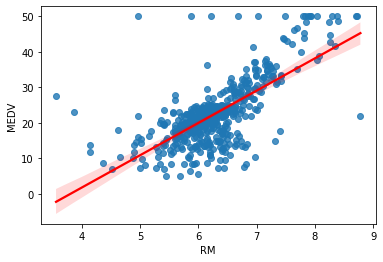

In [ ]:
sns.regplot(data=df, x='RM', y='MEDV', line_kws={'color': 'red'})
plt.show()

### 노후화 정도와 집값의 관계?

1940년 이전 주택 비율(`AGE`)이 증가함에 따라 주택가격(`MEDV`)은 다소 감소를 보이는 음의 상관관계가 있으나 이는 확실치 않아 보인다.

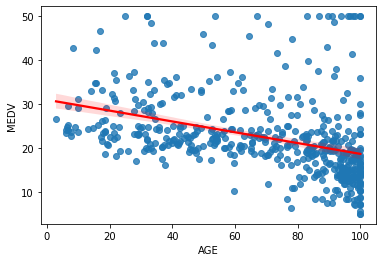

In [ ]:
sns.regplot(data=df, x='AGE', y='MEDV', line_kws={'color': 'red'})
plt.show()

### 직주근접?

접근성 지수(`DIS`)가 증가함에 따라 주택가격(`MEDV`) 또한 증가하는 **양의 상관관계**가 있어보인다.

> 접근성 지수는 직업센터와의 거리로 높을 수록 멀다는 의미이다.

그러나 위에서 1940년 이전 주택 비율과 집값의 관계가 애매했기 때문에 이 또한 관계를 정의하기가 어렵다.

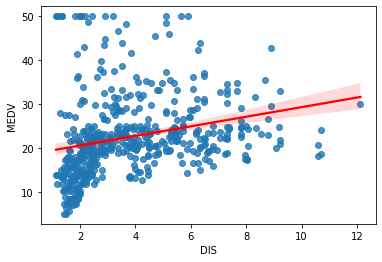

In [ ]:
sns.regplot(data=df, x='DIS', y='MEDV', line_kws={'color': 'red'})
plt.show()

그러나 여기서 `AGE`의 정도에 따라 분류를 해보면 `DIS`가 짧을 수록 노후화된 집이 많다는 것을 알 수 있다.

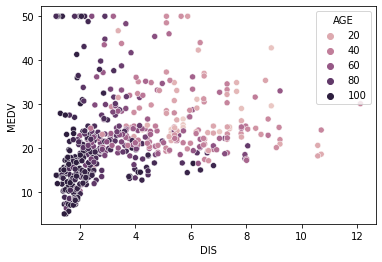

In [ ]:
sns.scatterplot(data=df, x='DIS', y='MEDV', hue='AGE')
plt.show()

### 찰스강뷰?

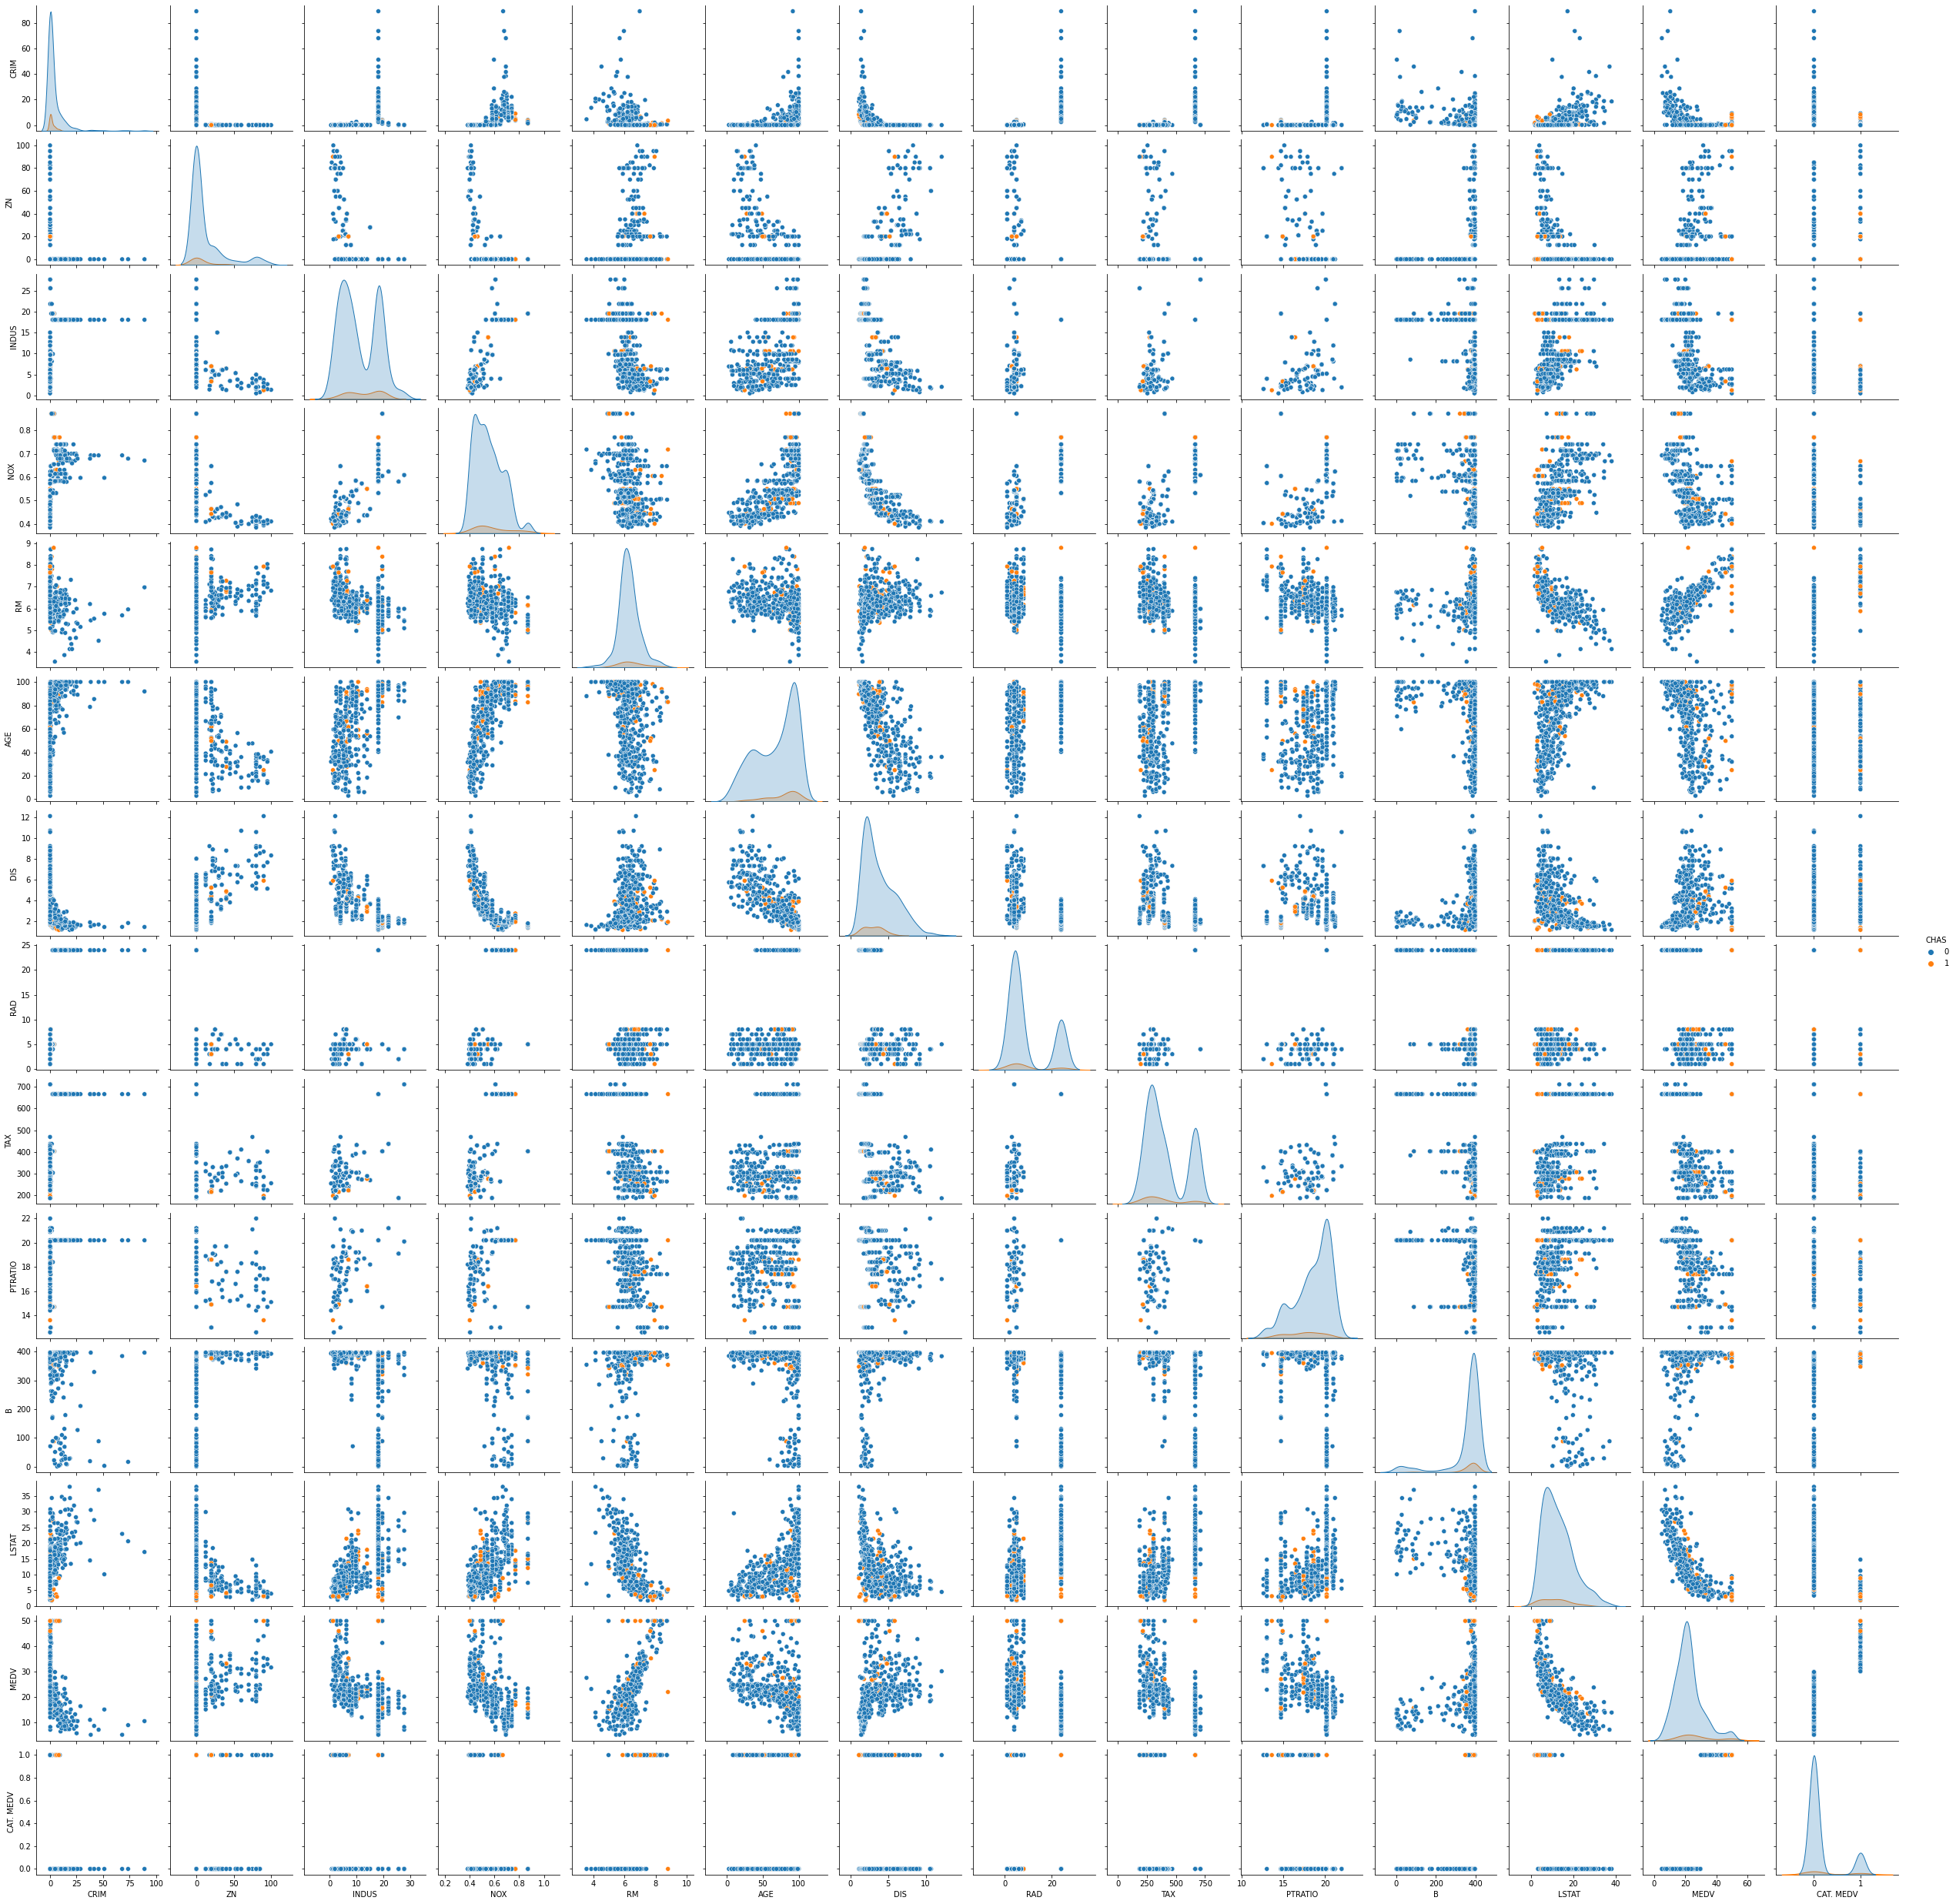

In [ ]:
sns.pairplot(data=df, hue='CHAS')
plt.show()

찰스강과 인접한 주택은 대체로 좋은 집일거라는 예상과는 달리 관련이 없어 보인다.

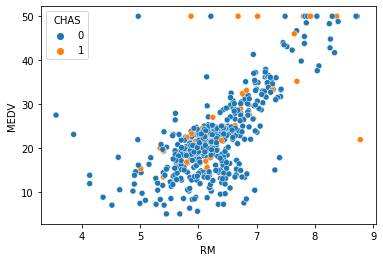

In [ ]:
sns.scatterplot(data=df, x='RM', y='MEDV', hue='CHAS')
plt.show()

찰스강과 인접한 경우 주택가격(`MEDV`)의 평균값와 최소값이 어느정도 더 높은 수치를 보이고 있다.

In [ ]:
df.groupby('CHAS').agg({'MEDV': [np.mean, min]})

MEDV      
           mean   min
CHAS                 
0     22.093843   5.0
1     28.440000  13.4

각각의 경우를 히스토그램으로 나타냈을 때  
대체로 찰스강과 인접한 주택가격이 높은 비중을 차지하고 있음을 보이고 있다.

하지만 의외로 그렇지 아니한 부분도 꽤 보인다.

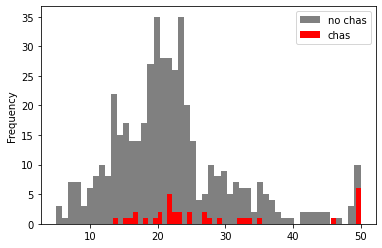

In [ ]:
df.loc[df['CHAS'] == 0, 'MEDV'].plot.hist(bins=50, color='gray', label='no chas')
df.loc[df['CHAS'] == 1, 'MEDV'].plot.hist(bins=50, color='red', label='chas')
plt.legend()
plt.show()

그렇다면 찰스강은 사실 뷰가 별로였던 걸까?

`MEDV` 외에 연관있는 요소가 있을까?

- 직장과의 거리 (`DIS`)
- 교통 (`RAD`)
- 일산화질소 농도 (`NOX`)
- 도시가 아님 (`INDUS`)
- 그 외 요소 (`B`, `AGE`)

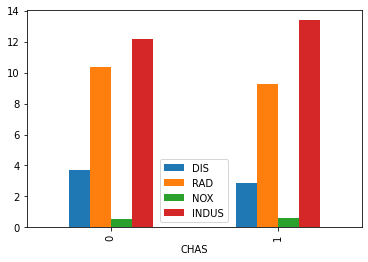

In [ ]:
t = df.loc[(df['CAT. MEDV'] == 0)].groupby('CHAS').mean()
t = t[['DIS', 'RAD', 'NOX', 'INDUS']]
t.plot.bar()
plt.show()

In [ ]:
t

,DIS,RAD,NOX,INDUS
CHAS,,,,
0,3.732322,10.379397,0.563236,12.189372
1,2.873225,9.291667,0.624208,13.374167


실제로 별 차이는 없는 것 같다.

### 직주근접이면서 소형 평수인 경우?

`CAT. MEDV` 값이 0 인 기준으로 본 결과 양의 상관관계가 나타난다.

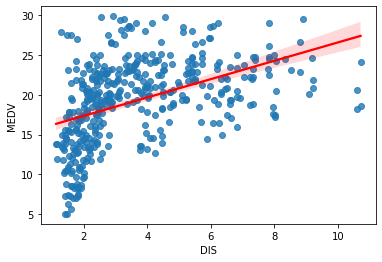

In [ ]:
t = df[df['CAT. MEDV'] == 0]
sns.regplot(data=t, x='DIS', y='MEDV', line_kws={'color': 'red'})
plt.show()

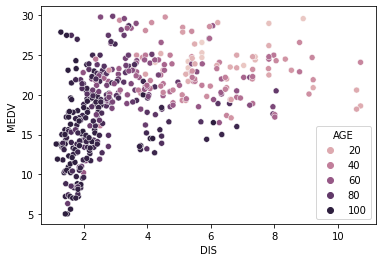

In [ ]:
sns.scatterplot(data=t, x='DIS', y='MEDV', hue='AGE')
plt.show()

### 범죄율?

범죄 발생 건수가 증가함에 따라 집값은 감소하는 음의 상관관계가 보인다.

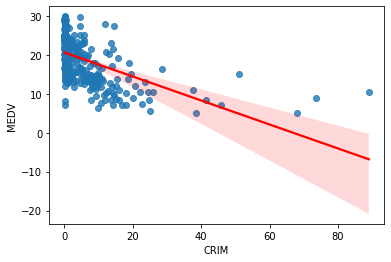

In [ ]:
sns.regplot(data=t, x='CRIM', y='MEDV', line_kws={'color': 'red'})
plt.show()

### 서민들의 동네일수록 집값도 낮을까?



예상했던 바와 같이 하위 계층 비율이 높은 동네일 수록 집값 또한 하락한다.

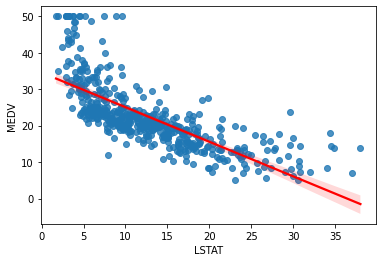

In [ ]:
sns.regplot(data=df, x='LSTAT', y='MEDV', line_kws={'color': 'red'})
plt.show()

### 잘사는 동네는 공기도 좋을까?


공기가 좋은 동네일 수록 집값 또한 상승한다.

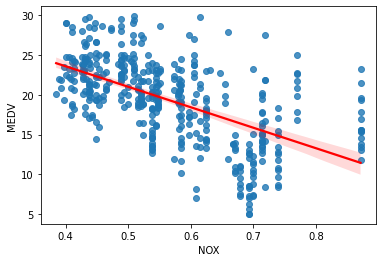

In [ ]:
sns.regplot(data=t, x='NOX', y='MEDV', line_kws={'color': 'red'})
plt.show()

참고로 `DIS`가 가까울 수록, 즉 `AGE`가 높을 수록 공기가 안좋다는 것 또한 알 수 있다.

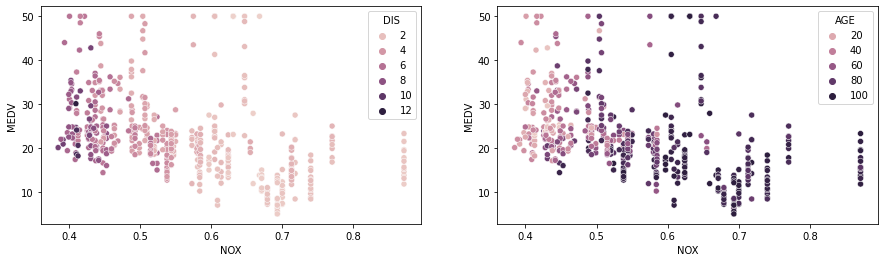

In [45]:
fig = plt.figure(figsize=(15, 4))
graph1 = fig.add_subplot(1, 2, 1)
graph2 = fig.add_subplot(1, 2, 2)

sns.scatterplot(data=df, x='NOX', y='MEDV', hue='DIS', ax=graph1)
sns.scatterplot(data=df, x='NOX', y='MEDV', hue='AGE', ax=graph2)
plt.show()

## 결론

어쩌다보니 Scatter Plot 원툴이 되어버렸다.

설명이 부족했던 부분은 논리적으로 설명을 할 자신이 없었는데  
상관관계가 이렇다 하더라도 이에 대한 근거에 기반한 정보가 없으면 그저 그런 추측만 되는 것 같다.

그래서 결론을 내리기에는 무리가 있기에 소감이라도 대체한다...